# **Stock Price Prediction Model**



This project focuses on creating a deep learning-based stock price prediction. This model leverages advanced deep learning architectures like Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) to predict stock prices.
The final aim of the project is to create a web-based application where users can choose a company and get stock price predictions.

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 16.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 82.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp310-cp310-linux_x86_64.whl size=843014 sha256=e6b6282ebb56e66233008dd6af19f430e0441b6c418ce47f6ffec64c997a8d82
  Stored in directory: /root/.cache/pip/wheels/75/79/e5/8838db0594cc6c587142fd2563356392ade6255c5930411069
Successfully built peewee


In [2]:
import yfinance as yf
# Download historical stock price data for the company
company='TSLA'
data = yf.download(company, end='2023-12-31')

[*********************100%***********************]  1 of 1 completed


In [3]:
print(data.head())

Price          Close      High       Low      Open     Volume
Ticker          TSLA      TSLA      TSLA      TSLA       TSLA
Date                                                         
2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


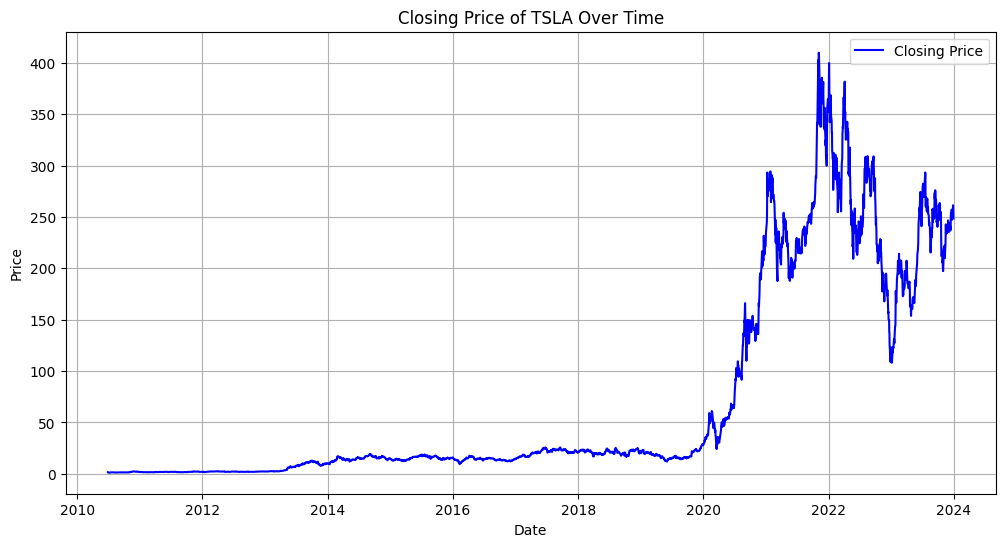

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data` is a DataFrame with a DateTime index and a 'Close' column for the closing price
def plot_closing_price(data, stock_name='Stock'):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], color='blue', label='Closing Price')
    plt.title(f"Closing Price of {stock_name} Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_closing_price(data, stock_name=company)


# **Selection of Technical Indicators**
In developing a stock price prediction model focused on short-term gains, I chose specific technical indicators that are most relevant to capturing immediate market movements and volatility. The selected indicators include:


1. Exponential Moving Average (EMA):
Purpose: EMA smooths out price data to identify trends, giving more weight to recent prices.
Use: Helps spot short- to medium-term price trends.
2. Relative Strength Index (RSI):
Purpose: Measures momentum, identifying overbought (>70) or oversold (<30)
conditions.
Use: Helps identify potential market reversals.
3. Moving Average Convergence Divergence (MACD):
Purpose: Shows the difference between two EMAs, signaling momentum shifts and trend reversals.
Use: Helps identify trend changes and momentum shifts.
4. Average True Range (ATR):
Purpose: Measures market volatility by tracking the range of price movements.
Use: Assesses potential price movement range and volatility.
5. Volume:
Purpose: Tracks the number of shares traded, confirming the strength of price movements.
Use: Confirms trend strength and market interest.

In [6]:
def calculate_key_indicators(df):
    # Exponential Moving Averages (EMA) - Adjusting to capture longer trends
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

    # Relative Strength Index (RSI) - Adjusting window to 21 for 1 month
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=21).mean()  # Changed to 21
    loss = (-delta.where(delta < 0, 0)).rolling(window=21).mean()  # Changed to 21
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Moving Average Convergence Divergence (MACD) - Adjusting to 10 and 30 for longer trends
    ema_10 = df['Close'].ewm(span=10, adjust=False).mean()  # Adjusted span to 10
    ema_30 = df['Close'].ewm(span=30, adjust=False).mean()  # Adjusted span to 30
    df['MACD'] = ema_10 - ema_30

    # Average True Range (ATR) - Adjusting to a 20-day window for better volatility capture
    high_low = (df['High'] - df['Low']).reindex(df.index)         # Reindex to align
    high_close = (df['High'] - df['Close'].shift()).abs().reindex(df.index)
    low_close = (df['Low'] - df['Close'].shift()).abs().reindex(df.index)
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    df['ATR'] = tr.rolling(window=20).mean()  # Adjusted to 20

    return df

data = calculate_key_indicators(data)

# Display the last rows of a sample company to verify
data.tail()


Price,Close,High,Low,Open,Volume,EMA_20,RSI,MACD,ATR
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,,,
Date,,,,,,,,,
2023-12-22,252.539993,258.220001,251.369995,256.760010,93249800,244.955352,61.288327,7.085533,8.578503
2023-12-26,256.609985,257.970001,252.910004,254.490005,86892400,246.065317,62.592232,7.482472,8.538503
2023-12-27,261.440002,263.339996,257.519989,258.350006,106494400,247.529573,64.373156,8.265087,8.225504
2023-12-28,253.179993,265.130005,252.710007,263.660004,113619900,248.067708,53.762808,7.798231,8.347003
2023-12-29,248.479996,255.190002,247.429993,255.100006,100615300,248.106973,52.467028,6.798106,8.319504


# **Data Preprocessing**

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

,,0
Price,Ticker,
Close,TSLA,0
High,TSLA,0
Low,TSLA,0
Open,TSLA,0
Volume,TSLA,0
EMA_20,,0
RSI,,0
MACD,,0
ATR,,0


In [9]:
print(data.head())

Price          Close      High       Low      Open    Volume    EMA_20  \
Ticker          TSLA      TSLA      TSLA      TSLA      TSLA             
Date                                                                     
2010-07-28  1.381333  1.393333  1.367333  1.370000   7008000  1.376245   
2010-07-29  1.356667  1.392000  1.333333  1.384667   9240000  1.374381   
2010-07-30  1.329333  1.362667  1.303333  1.346667   6403500  1.370090   
2010-08-02  1.394667  1.398000  1.355333  1.366667  10771500  1.372431   
2010-08-03  1.463333  1.463333  1.388000  1.400000  18457500  1.381088   

Price             RSI      MACD       ATR  
Ticker                                     
Date                                       
2010-07-28  41.519502 -0.031414  0.147867  
2010-07-29  40.713532 -0.030928  0.127067  
2010-07-30  39.979362 -0.033399  0.111200  
2010-08-02  47.192240 -0.027235  0.100000  
2010-08-03  58.189388 -0.014143  0.089867  


In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the relevant columns for each company
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

# Example output of scaled data for one company
print("Scaled Data for TATAPOWER.NS:")
print(scaled_data.tail())

Scaled Data for TATAPOWER.NS:
Price          Close      High       Low      Open    Volume    EMA_20  \
Ticker          TSLA      TSLA      TSLA      TSLA      TSLA             
Date                                                                     
2023-12-22  0.614894  0.621884  0.618557  0.622919  0.100265  0.672982   
2023-12-26  0.624850  0.621279  0.622364  0.617386  0.093297  0.676047   
2023-12-27  0.636665  0.634272  0.633760  0.626795  0.114783  0.680091   
2023-12-28  0.616460  0.638603  0.621869  0.639737  0.122593  0.681578   
2023-12-29  0.604963  0.614553  0.608816  0.618873  0.108339  0.681686   

Price            RSI      MACD       ATR  
Ticker                                    
Date                                      
2023-12-22  0.578014  0.476389  0.350294  
2023-12-26  0.594089  0.480904  0.348653  
2023-12-27  0.616043  0.489806  0.335816  
2023-12-28  0.485242  0.484496  0.340799  
2023-12-29  0.469269  0.473120  0.339671  


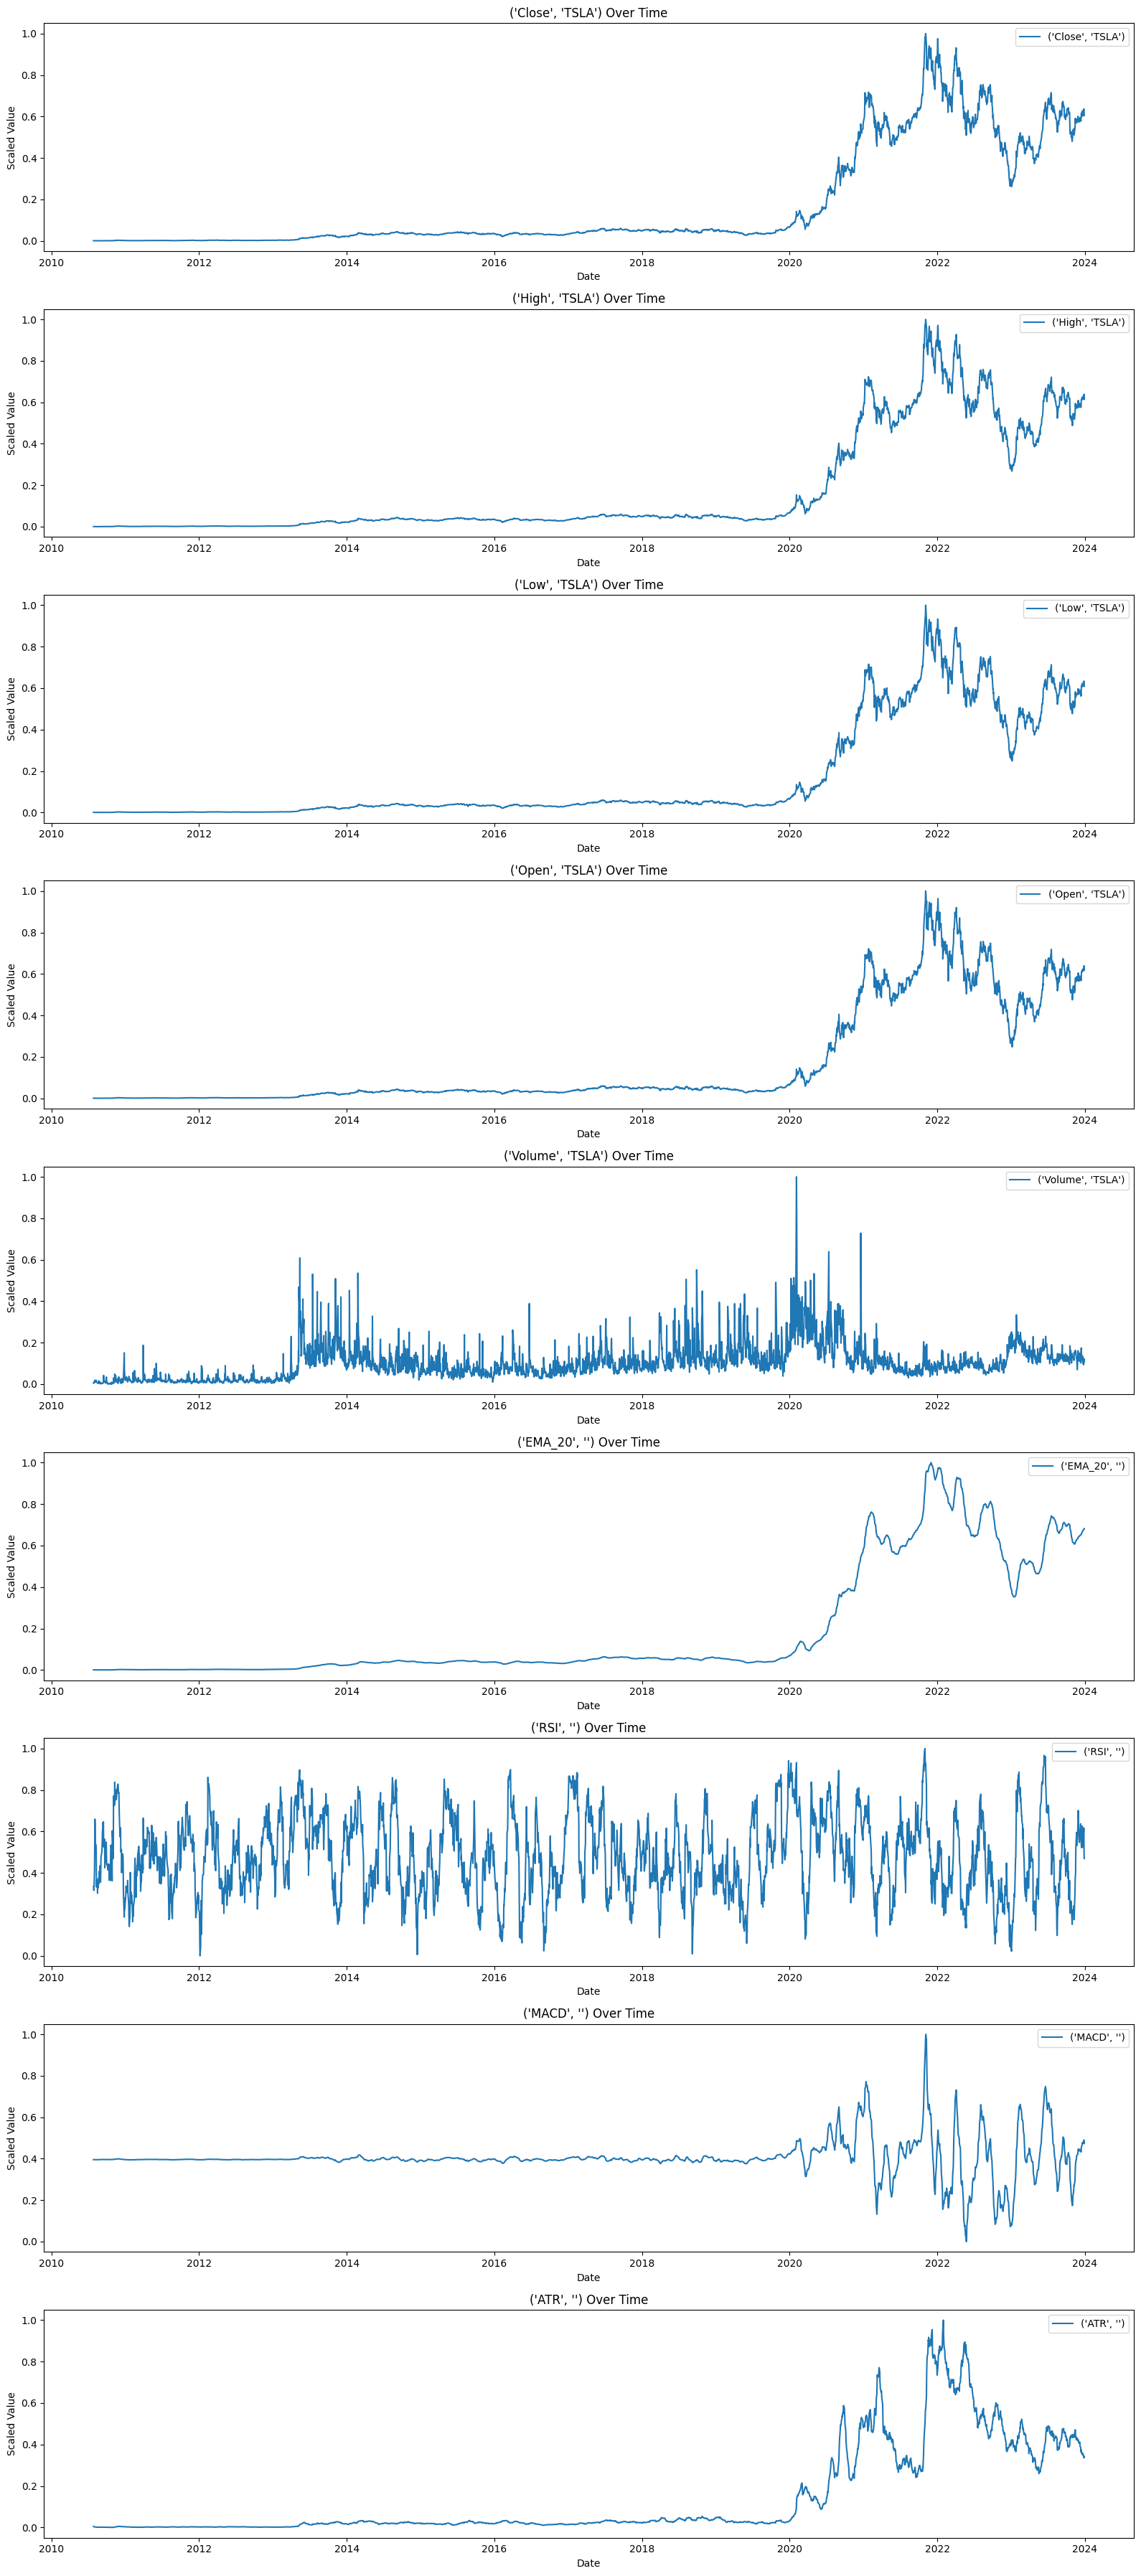

In [11]:
import matplotlib.pyplot as plt

def visualize_scaled_data(scaled_df):
    features = scaled_df.columns  # Extract column names (features)
    num_features = len(features)

    # Set up the figure size and subplots
    plt.figure(figsize=(16, 4 * num_features))

    # Plot each feature
    for i, feature in enumerate(features):
        plt.subplot(num_features, 1, i + 1)
        plt.plot(scaled_df.index, scaled_df[feature], label=feature)
        plt.title(f'{feature} Over Time')
        plt.xlabel('Date')
        plt.ylabel('Scaled Value')
        plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

visualize_scaled_data(scaled_data)


# **Data Preparation**

In [12]:
def create_sequences(data, sequence_length=60):
    X, y ,date= [], [], []
    for i in range(len(data) - sequence_length):
        # Use .iloc for integer-location based indexing
        X.append(np.delete(data.iloc[i:i + sequence_length].values, 0, axis=1))
        # Access the element using .iloc
        y.append(data.iloc[i + sequence_length, 0])
        date.append(data.index[i + sequence_length])
    return np.array(X), np.array(y), date

In [13]:
from sklearn.model_selection import train_test_split
# Convert the DataFrame's index to datetime (if not already)
scaled_data.index = pd.to_datetime(scaled_data.index)

# Define the cutoff dates for training and testing
train_end_date = "2023-08-30"

# Filter the data for training and testing based on dates
train_data = scaled_data[scaled_data.index <= train_end_date]
test_data = scaled_data[scaled_data.index > train_end_date]

# Create sequences for training and testing
X_train_full, y_train_full , dates_train= create_sequences(train_data, 60)
X_train,X_val,y_train,y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
X_test, y_test ,dates_test= create_sequences(test_data, 60)

# Confirm shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_val shape: {X_val.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_val shape: {y_val.shape}")


X_train shape: (2588, 60, 8)
X_test shape: (24, 60, 8)
X_val shape: (648, 60, 8)
y_train shape: (2588,)
y_test shape: (24,)
y_val shape: (648,)


# Hyperparameter tuning to find the best parameters for the lstm and gru models

In [18]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


In [19]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,GRU
from tensorflow.keras.optimizers import Adam

# LSTM trial

In [ ]:

def objective_lstm(trial):
    # Suggest values for hyperparameters
    units = trial.suggest_int('units', 50, 200)
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    num_layers = trial.suggest_int('num_layers', 1, 3)

    # Build LSTM model
    model = Sequential()
    for i in range(num_layers):
        model.add(LSTM(units, return_sequences=(i < num_layers - 1), input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    # Train the model and return the validation loss
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    val_loss = history.history['val_loss'][-1]
    return val_loss

# Run Optuna study to find the best hyperparameters for the LSTM model
study_lstm = optuna.create_study(direction='minimize')
study_lstm.optimize(objective_lstm, n_trials=50)

# Display the best hyperparameters for the LSTM model
print("Best hyperparameters for LSTM:", study_lstm.best_params)


[I 2024-12-18 11:22:01,249] A new study created in memory with name: no-name-ce255d7d-0d9d-464e-9e89-c3bca916566b
<ipython-input-18-e5b1bb1691c5>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2024-12-18 11:22:36,772] Trial 0 finished with value: 0.0006957107689231634 and parameters: {'units': 143, 'dropout_rate': 0.4398223177865814, 'learning_rate': 0.0013435956388503964, 'num_layers': 1}. Best is trial 0 with value: 0.0006957107689231634.
[I 2024-12-18 11:23:05,373] Trial 1 finished with value: 0.00019681952835526317 and parameters: {'units': 128, 'dropout_rate': 0.24502660230075846, 'learning_rate': 0.0023448656171386395, 'num_layers': 1}. Best is trial 1 with value: 0.00019681952835526317.
[I 2024-12-18 11:25:23,237] Trial 2 finished with value: 0.00

Best hyperparameters for LSTM: {'units': 106, 'dropout_rate': 0.2537337561276539, 'learning_rate': 0.007946510647271381, 'num_layers': 1}


# GRU trial

In [ ]:
# Define the objective function for GRU hyperparameter tuning
def objective_gru(trial):
    # Suggest values for hyperparameters
    units = trial.suggest_int('units', 50, 200)
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    num_layers = trial.suggest_int('num_layers', 1, 3)

    # Build GRU model
    model = Sequential()
    for i in range(num_layers):
        model.add(GRU(units, return_sequences=(i < num_layers - 1), input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    # Train the model and return the validation loss
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    val_loss = history.history['val_loss'][-1]
    return val_loss

# Run Optuna study to find the best hyperparameters for the GRU model
study_gru = optuna.create_study(direction='minimize')
study_gru.optimize(objective_gru, n_trials=50)

# Display the best hyperparameters for the GRU model
print("Best hyperparameters for GRU:", study_gru.best_params)


[I 2024-12-18 11:56:01,465] A new study created in memory with name: no-name-07eb5f00-e172-42a7-882c-0d70534a7fa0
<ipython-input-19-5dd78501b67f>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2024-12-18 11:58:56,114] Trial 0 finished with value: 0.0003222038794774562 and parameters: {'units': 192, 'dropout_rate': 0.4876379396308821, 'learning_rate': 0.005858665053100085, 'num_layers': 3}. Best is trial 0 with value: 0.0003222038794774562.
[I 2024-12-18 12:00:47,492] Trial 1 finished with value: 0.00033291144063696265 and parameters: {'units': 155, 'dropout_rate': 0.3313918953097909, 'learning_rate': 0.0020611777279718486, 'num_layers': 3}. Best is trial 0 with value: 0.0003222038794774562.
[I 2024-12-18 12:01:23,558] Trial 2 finished with value: 0.00026

Best hyperparameters for GRU: {'units': 140, 'dropout_rate': 0.3580950814106016, 'learning_rate': 0.001214340629825727, 'num_layers': 1}


# **Model Building, training and evaluating**

# LSTM Model

In [20]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(106, return_sequences=False, input_shape=input_shape))  # Outputs only the final hidden state
    model.add(Dropout(0.2537337561276539))  # Dropout for regularization
    model.add(Dense(1))  # Single output for regression (predicting the next price)
    model.compile(optimizer=Adam(learning_rate=0.007946510647271381), loss='mse')  # Compiling with MSE loss for regression
    return model

# GRU MODEL

In [21]:
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(115, return_sequences=False, input_shape=input_shape))  # First GRU layer, outputs sequences
    model.add(Dropout(0.39491416680463415))  # Dropout for regularization
    model.add(Dense(1))  # Single output for regression (predicting the next price)
    model.compile(optimizer=Adam(learning_rate=0.0021809167816739215), loss='mse')  # Compiling with MSE loss for regression
    return model

# Training models

In [22]:
# Model input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Initialize models
lstm_model = create_lstm_model(input_shape)
gru_model = create_gru_model(input_shape)

# Training parameters
epochs = 20
batch_size = 32

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train LSTM
historylstm = lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[early_stopping], verbose=1)

# Train GRU
historygru = gru_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[early_stopping], verbose=1)


Epoch 1/20
65/65 [==============================] - 4s 40ms/step - loss: 0.0097 - val_loss: 8.0038e-04
Epoch 2/20
65/65 [==============================] - 2s 37ms/step - loss: 0.0012 - val_loss: 2.7049e-04
Epoch 3/20
65/65 [==============================] - 2s 35ms/step - loss: 9.9055e-04 - val_loss: 3.0007e-04
Epoch 4/20
65/65 [==============================] - 2s 35ms/step - loss: 8.6459e-04 - val_loss: 2.8430e-04
Epoch 5/20
65/65 [==============================] - 2s 35ms/step - loss: 0.0010 - val_loss: 8.6844e-04
Epoch 6/20
65/65 [==============================] - 2s 33ms/step - loss: 7.3287e-04 - val_loss: 2.4275e-04
Epoch 7/20
65/65 [==============================] - 2s 35ms/step - loss: 7.1878e-04 - val_loss: 4.3172e-04
Epoch 8/20
65/65 [==============================] - 2s 34ms/step - loss: 6.5556e-04 - val_loss: 2.0947e-04
Epoch 9/20
65/65 [==============================] - 2s 32ms/step - loss: 7.5687e-04 - val_loss: 2.9186e-04
Epoch 10/20
65/65 [==============================

In [23]:
lstm_test_loss = lstm_model.evaluate(X_test, y_test)
gru_test_loss = gru_model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 30ms/step - loss: 2.4942e-04


# **Ensembling both the models together using stacking**

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lstm_val_predictions = lstm_model.predict(X_val)
gru_val_predictions = gru_model.predict(X_val)

# Combine predictions into a single input for the meta-model
# Stack predictions horizontally
stacked_val_predictions = np.hstack((lstm_val_predictions, gru_val_predictions))

# Step 3: Train a meta-model (e.g., Linear Regression)
# Note: Use validation data or a subset of the test set for meta-model training
meta_model = LinearRegression()
meta_model.fit(stacked_val_predictions, y_val)

# Step 4: Make final predictions using the trained meta-model
# Combine test predictions into a single input for the meta-model
lstm_test_predictions = lstm_model.predict(X_test)
gru_test_predictions = gru_model.predict(X_test)
stacked_test_predictions = np.hstack((lstm_test_predictions, gru_test_predictions))
final_predictions = meta_model.predict(stacked_test_predictions)

# Step 5: Evaluate performance
mse = mean_squared_error(final_predictions,y_test)
print(f"Mean Squared Error of Stacked Model: {mse}")


1/1 [==============================] - 0s 30ms/step
Mean Squared Error of Stacked Model: 0.00026051498551947375


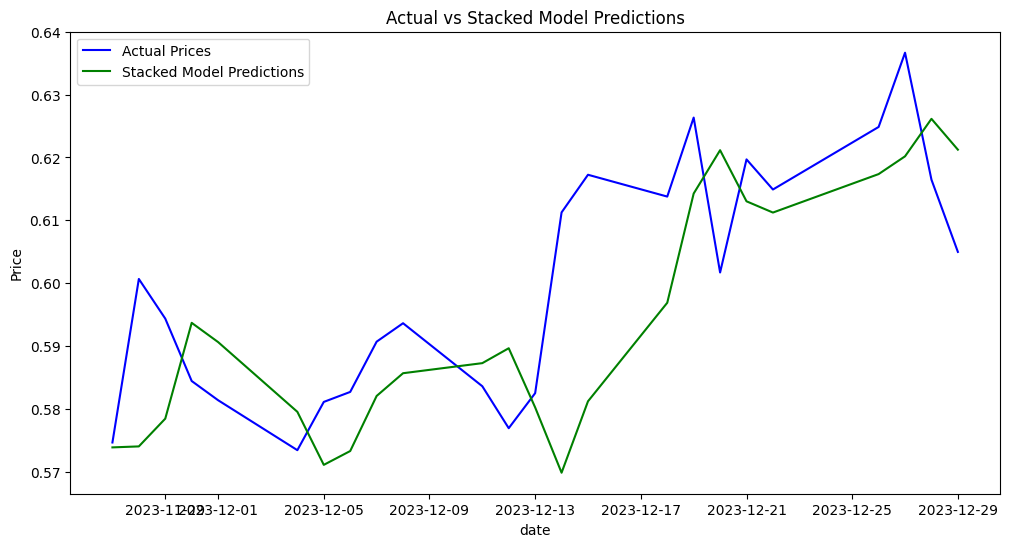

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(dates_test,y_test, label="Actual Prices", color='blue')
plt.plot(dates_test,final_predictions, label="Stacked Model Predictions", color='green')
plt.title("Actual vs Stacked Model Predictions")
plt.xlabel("date")
plt.ylabel("Price")
plt.legend()
plt.show()